# Exploratory data analysis

Analysis of data with respect to the problem statement to become one with the data.


## Plots

In [1]:
# !wget https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv

In [2]:
# !mv iris.csv data/

In [3]:
# Load imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [4]:
# Load iris data
iris = pd.read_csv("data/iris.csv")

In [5]:
# Number of data points
print(iris.shape)

(150, 5)


In [6]:
# Number of features
print(iris.columns)

Index(['sepal.length', 'sepal.width', 'petal.length', 'petal.width',
       'variety'],
      dtype='object')


In [7]:
# Class balanced or imbalanced?
iris["variety"].value_counts()

variety
Setosa        50
Versicolor    50
Virginica     50
Name: count, dtype: int64

### Scatter Plots

<Axes: xlabel='sepal.length', ylabel='sepal.width'>

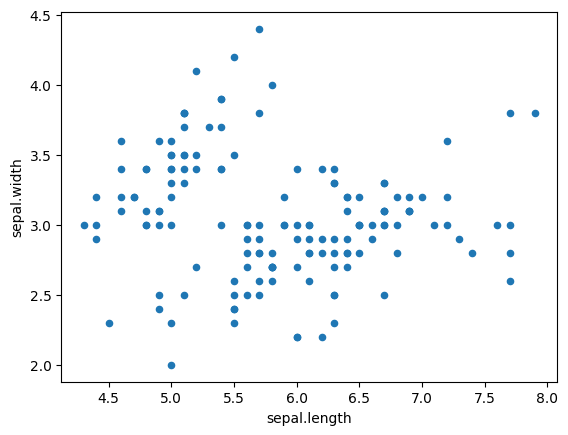

In [8]:
iris.plot(kind="scatter", x="sepal.length", y="sepal.width")

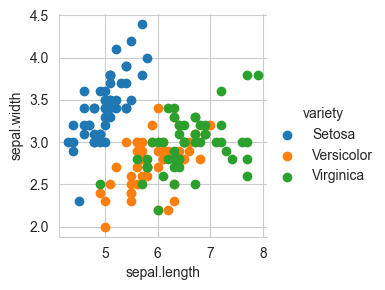

In [9]:
# Highligh class in scatter plot
sns.set_style("whitegrid")
sns.FacetGrid(iris, hue="variety").map(plt.scatter, "sepal.length", "sepal.width").add_legend();
plt.show();

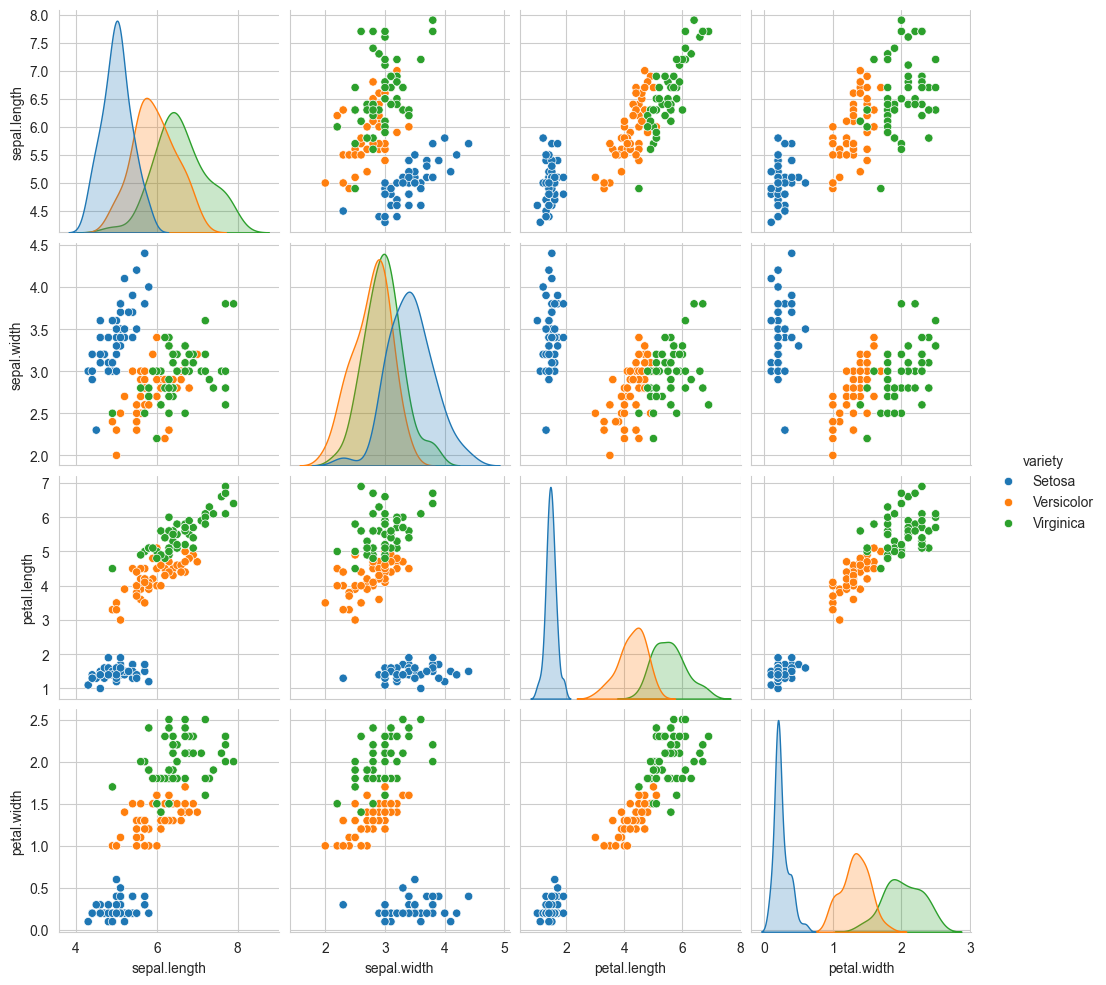

In [10]:
# Based on the plot setosa is linearly seperable from versicolor and virginica, let's try to add more features and see if the other two are seperable or not.
# We can use plotly to visualize 3d scatter plot. But we've four features, let's see how to visualize for dimensions with regards to a target variable.
sns.pairplot(iris, hue='variety')

* By looking at pair plot, petal_length and petal_width are the best features to model the model on
* We can seperate setosa from other flowers with simple rule and other flowers has some overlap

we can visualize what two feature combinations are most important to predict the target variable. The limitation is we can get inference based on two feature combinations alone and it can's scale well for n features where n > 10 or 100. This works well for less dimensional data(less features.)


In [11]:
iris.variety.unique()

array(['Setosa', 'Versicolor', 'Virginica'], dtype=object)

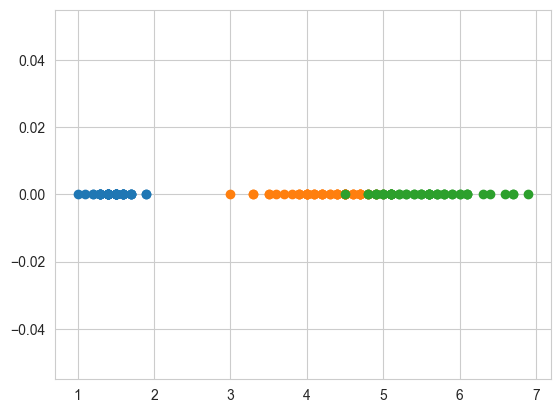

In [12]:
# Let's try a 1d plot with petal length
iris_setosa = iris[iris["variety"] == "Setosa"]
iris_versicolor = iris[iris["variety"] == "Versicolor"]
iris_virginica = iris[iris["variety"] == "Virginica"]

plt.plot(iris_setosa["petal.length"], np.zeros_like(iris_setosa["petal.length"]), "o")
plt.plot(iris_versicolor["petal.length"], np.zeros_like(iris_versicolor["petal.length"]), "o")
plt.plot(iris_virginica["petal.length"], np.zeros_like(iris_virginica["petal.length"]), "o")

1D scatter plot overlaps data points a lot, is there better way of visualizing them...
These are just points to identify the range of numbers for a class. We can use historgram again to do this.

### Historgram

/Users/jayaprakashsivagami/Documents/Tech/conda/envs/nlp/lib/python3.9/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  func(*plot_args, **plot_kwargs)
/Users/jayaprakashsivagami/Documents/Tech/conda/envs/nlp/lib/python3.9/site-packages/seaborn/axisgrid.py:854: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed29744

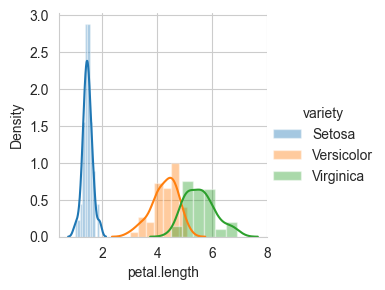

In [13]:
sns.FacetGrid(iris, hue="variety") \
    .map(sns.distplot, "petal.length") \
    .add_legend();
plt.show();

On observation of this graph, we can see the petal lengths in x axis and how many data points is in y axis. The smoothed blue, orange and green lines are called Probability Distribution Functions(PDF) which gives a smoothed estimate of the distribution.

Again based on the graph, we can write simple rules with if we can seperate the iris flower varieties based on petal length. Setosa can be seperated cleary but versicolor and virginica can't be seperated exactly.

if pl <= 2: setos elif pl > 2 and pl < 4.7 versicolor else virginica.

### Probabality Density Function

We alreay saw in history how a PDF looks like. Why density function because it show how dense or how many data points are present in a range for a single feature.

Univariate analysis using PDF: Which feature out of four features are best suited to model on variety label.

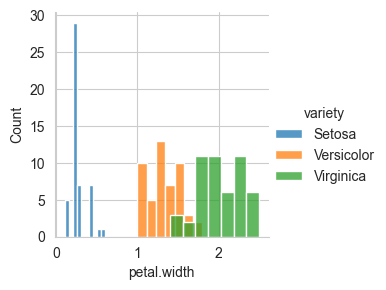

In [14]:
# We've already plotted petal width let's see the historgram for remaining three features
sns.FacetGrid(iris, hue="variety") \
.map(sns.histplot, "petal.width") \
.add_legend();

plt.show()

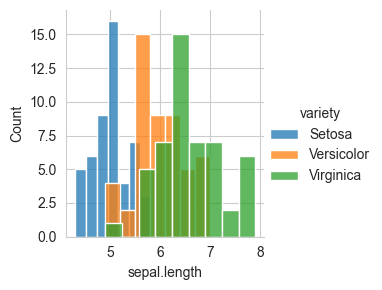

In [15]:
sns.FacetGrid(iris, hue="variety") \
.map(sns.histplot, "sepal.length") \
.add_legend();

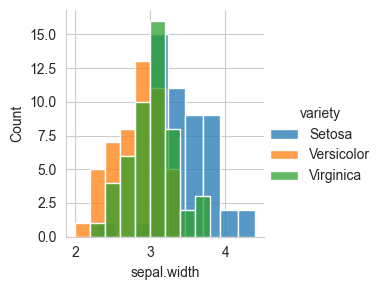

In [16]:
sns.FacetGrid(iris, hue="variety") \
.map(sns.histplot, "sepal.width") \
.add_legend();

Based on the pdf for all four features, pl > pw > sl > sw.

### Cumulative Distributive Function

 CDF(Cumulative Distributive function) - visually find the percentage of target class with respect to a feature. Feature in x-axis and percentage in y-axis, with this we can find info like 80% of setosa flowers have a petal length within this range.
		* CDF is nothing but calculation of percentages. Ex there are petal lengths of 20 setosa flowers in a 50 point dataset is below 1.2. Then the percentage here is 20/50, 30 flowers have petal lenght below 1.3, then this is 30/50. Plot the percentage on y axis with petal length on x axis. This is nothing but cumulative sum average

In [18]:
counts, bin_edges = np.histogram(
    iris_setosa["petal.length"], # Feature to plot histogram
    bins=10, 
    density=True, # calculate probabality distribution
    )

pdf = counts / (sum(counts))

print(pdf)
print(bin_edges)

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]


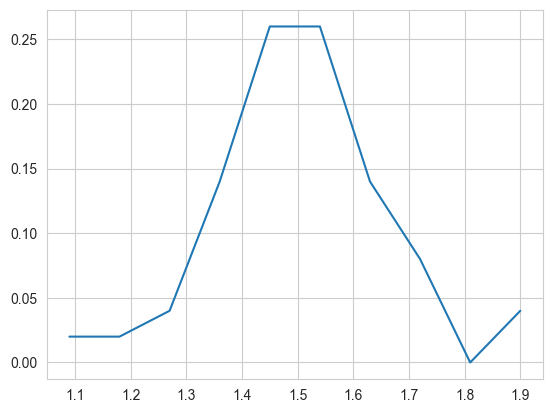

In [21]:
plt.plot(bin_edges[1:], pdf)

In [22]:
# Compute CDF
cdf = np.cumsum(pdf)

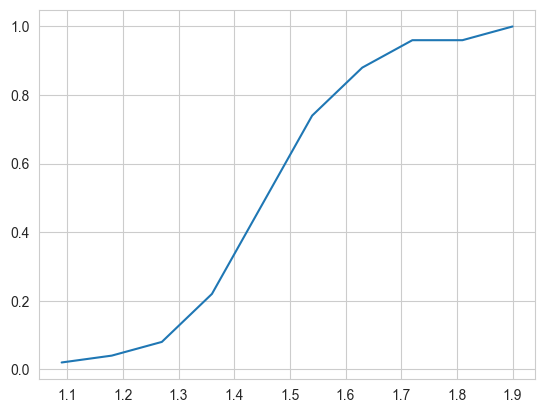

In [23]:
plt.plot(bin_edges[1:], cdf)

[0.02 0.02 0.04 0.14 0.26 0.26 0.14 0.08 0.   0.04]
[1.   1.09 1.18 1.27 1.36 1.45 1.54 1.63 1.72 1.81 1.9 ]
[0.02 0.12 0.36 0.44 0.62 0.78 0.88 0.92 0.94 1.  ]
[4.5  4.74 4.98 5.22 5.46 5.7  5.94 6.18 6.42 6.66 6.9 ]
[0.02 0.04 0.06 0.04 0.16 0.14 0.12 0.2  0.14 0.08]
[3.   3.21 3.42 3.63 3.84 4.05 4.26 4.47 4.68 4.89 5.1 ]


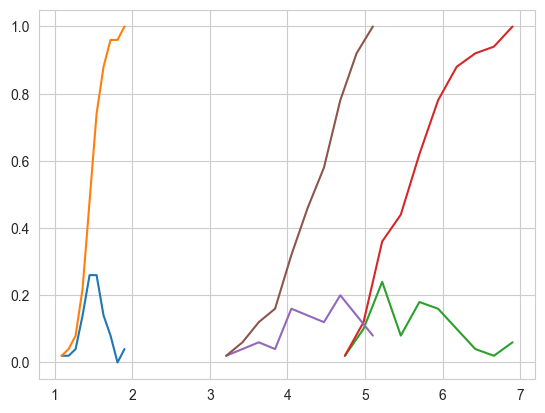

In [30]:
setosa_counts, bin_edges = np.histogram(iris_setosa["petal.length"], bins=10, density=True)
setosa_pdf = setosa_counts / (sum(setosa_counts))
setosa_cdf = np.cumsum(setosa_pdf)
print(setosa_pdf)
print(bin_edges)
plt.plot(bin_edges[1:], setosa_pdf)
plt.plot(bin_edges[1:], setosa_cdf)

viriginica_counts, bin_edges = np.histogram(iris_virginica["petal.length"], bins=10, density=True)
virginica_pdf = viriginica_counts / (sum(viriginica_counts))
virginica_cdf = np.cumsum(virginica_pdf)
print(virginica_cdf)
print(bin_edges)
plt.plot(bin_edges[1:], virginica_pdf)
plt.plot(bin_edges[1:], virginica_cdf)

versicolor_counts, bin_edges = np.histogram(iris_versicolor["petal.length"], bins=10, density=True)
versiclor_pdf = versicolor_counts / (sum(versicolor_counts))
versicolor_cdf = np.cumsum(versiclor_pdf)
print(versiclor_pdf)
print(bin_edges)
plt.plot(bin_edges[1:], versiclor_pdf)
plt.plot(bin_edges[1:], versicolor_cdf)

Using the information from CDF and PDF we can construct a simple model
```Python
if pl <= 2: # 100% accurate based 0n CDF
    print("setosa") 
elif pl > 2 and pl <= 5: # 95% accuracte predictions, 5% mistake
    print("virginica")
else pl > 5: # 90% accuracte
    print*("Versicolor")
```

### Mean, Variance, Standard-Deviation

* Mean - Average of a feature or central value. Central tendency of an feature

* Variance - For bigger spread or range of a feature variance/std will be large else small
	* Variance is summation of (each feature value - mean of the feature)^squared/number of elements
	* Square root of variance is standard deviation, Standard Deviation is how much each value in a feature varies from each other on an average. 
		
* With mean and standard deviation we can imagine the PDF without visualisation in numbers. But the disadvantage is these can be easily corrupted by a single outlier.

In [33]:
print("Mean:")
print(np.mean(iris_setosa["petal.length"]))
print(np.mean(iris_virginica["petal.length"]))
print(np.mean(iris_versicolor["petal.length"]))

# Mean is not usable when outlier is present
print(np.mean(np.append(iris_setosa["petal.length"], 40)))

print("Standard Deviation")
print(np.std(iris_setosa["petal.length"]))
print(np.std(iris_virginica["petal.length"]))
print(np.std(iris_versicolor["petal.length"]))


Mean:
1.4620000000000002
5.5520000000000005
4.26
2.2176470588235295
Standard Deviation
0.17191858538273283
0.546347874526844
0.4651881339845203


Based on this majority of setosa points petal lengths are between 1.46 + or - 0.17

### Median

Median can overcome the outlier disadvantage with mean when less than half the samples are corrupted. How to calculate mean as follows:

* Sort the list
* If length of elements in the list is odd, print the middle index
* Else get two elements in the middle of the index and get an average of them

In [34]:
print("Median:")
print(np.median(iris_setosa["petal.length"]))
print(np.median(iris_virginica["petal.length"]))
print(np.median(iris_versicolor["petal.length"]))

# Mean is not usable when outlier is present
print(np.median(np.append(iris_setosa["petal.length"], 40)))


Median:
1.5
5.55
4.35
1.5


Checkout the median is still the same with outlier 50 for setosa petal length and the values are similar to mean as well.

### Percentile and Quantile

* Percentile - Gives the range of numbers below a certain point in a range of data points.
	* If there are 25 data points for a feature, sort them
	* 5th index after sorting is the 25th percentile, this says 25% of the feature are below the value in 5th index. This goes on until 100 Percentile
* Quantile is 25th, 50th, 75th and 100th Percentile. In addition 50th Percentile is the Median

In [37]:
print("90th Percentile")
print(np.percentile(iris_setosa["petal.length"], 90))
print(np.percentile(iris_virginica["petal.length"], 90))
print(np.percentile(iris_versicolor["petal.length"], 90))

print("Quantiles")
print(np.percentile(iris_setosa["petal.length"], np.arange(0, 100, 25)))
print(np.percentile(iris_virginica["petal.length"], np.arange(0, 100, 25)))
print(np.percentile(iris_versicolor["petal.length"], np.arange(0, 100, 25)))


90th Percentile
1.7
6.31
4.8
Quantiles
[1.    1.4   1.5   1.575]
[4.5   5.1   5.55  5.875]
[3.   4.   4.35 4.6 ]


In [40]:
from statsmodels import robust
print("Median Absolute Deviation")
print(robust.mad(iris_setosa["petal.length"]))
print(robust.mad(iris_virginica["petal.length"]))
print(robust.mad(iris_versicolor["petal.length"]))

Median Absolute Deviation
0.14826022185056031
0.6671709983275211
0.5189107764769602


### Box Plot

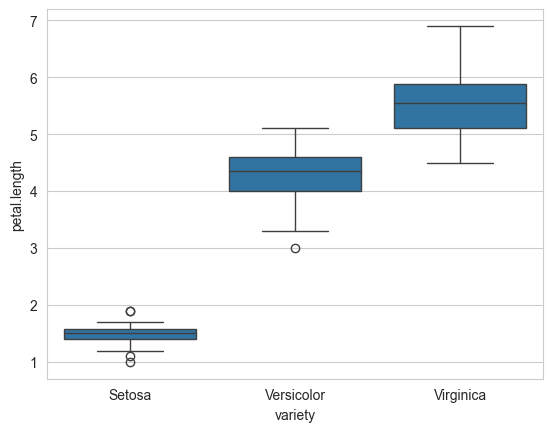

In [41]:
sns.boxplot(x="variety", y="petal.length", data=iris)
plt.show();

### Violin Plots

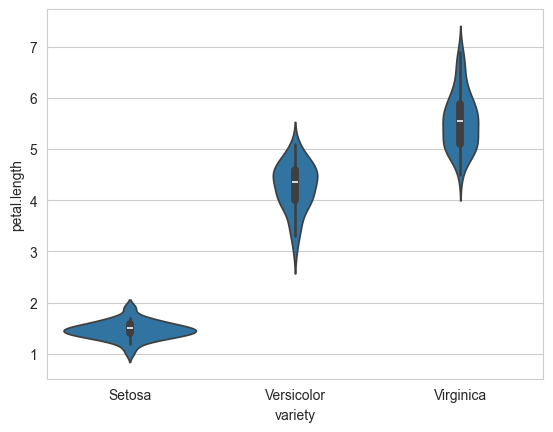

In [43]:
sns.violinplot(x="variety", y="petal.length", data=iris)
plt.show();

### MultiVariate Plot

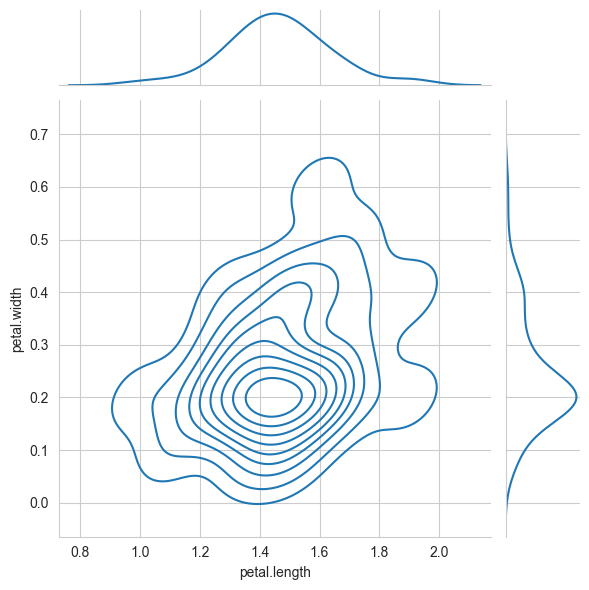

In [44]:
sns.jointplot(x="petal.length", y="petal.width", data=iris_setosa, kind="kde")
plt.show();

### Conclusion

* PDF, CDF, Histogram, Box plots, Violin plots - Univariate Analysis
* Pair Plot, 2D Scatter plot - Bi variate Analysis
* More than three features - MultiVariate Analysis - Contour plot
* 1D density - PDF
* 2D density - Contour